# **Document Classification in Supervised ML & Dense NN**

The sklearn 20newsgroup dataset is a collection of 20,000 newsgroup datas, each of which is labeled with one of 20 different newsgroups. The dataset is a good starting point for text classification tasks, as it provides a variety of different types of text to train on.

### **1. Importing Libraries**

In [4]:
import pandas as pd
import numpy as np

# importing string operations
import re
import string
import nltk
from nltk.corpus import stopwords

# imporitng the convertor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# importing evaluating metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import spacy
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# importing word cloud helper
from wordcloud import WordCloud

from nltk.corpus import stopwords

# importing visualization packages
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

#importing to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pprint

%matplotlib inline

### **2. Dataset**

In [5]:
# Load the dataset and explore its structure
newsgroups_data = fetch_20newsgroups(subset='all')
categories = newsgroups_data.target_names

In [6]:
# Analyze the distribution of documents across different newsgroups
newsgroups_count = pd.DataFrame({'Newsgroup': categories, 'Count': np.bincount(newsgroups_data.target)})
print(newsgroups_count)

                   Newsgroup  Count
0                alt.atheism    799
1              comp.graphics    973
2    comp.os.ms-windows.misc    985
3   comp.sys.ibm.pc.hardware    982
4      comp.sys.mac.hardware    963
5             comp.windows.x    988
6               misc.forsale    975
7                  rec.autos    990
8            rec.motorcycles    996
9         rec.sport.baseball    994
10          rec.sport.hockey    999
11                 sci.crypt    991
12           sci.electronics    984
13                   sci.med    990
14                 sci.space    987
15    soc.religion.christian    997
16        talk.politics.guns    910
17     talk.politics.mideast    940
18        talk.politics.misc    775
19        talk.religion.misc    628


In [7]:
for i in range(2):
  print(newsgroups_data.data[i])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video

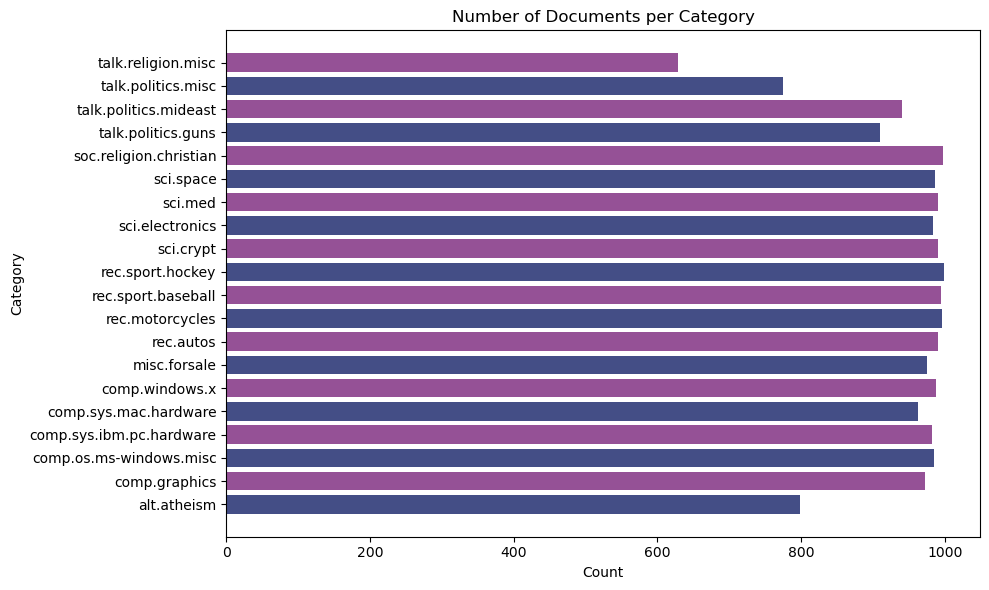

In [8]:
plt.figure(figsize=(10, 6))

# Plot the count of documents per category
category = list(newsgroups_count['Newsgroup'])
count = list(newsgroups_count['Count'])
colors = ['#444e86', '#955196']

plt.barh(range(len(newsgroups_count)), count, color=colors, tick_label=category)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Number of Documents per Category')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### **3. Train Test Split**

In [9]:
news_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [10]:
list(news_train)
print('Training data size:', len(news_train['data']))

Training data size: 11314


In [11]:
# Finding frequency of each category
targets, frequency = np.unique(news_train.target, return_counts=True)
targets, frequency 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

In [12]:
targets_str = np.array(news_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


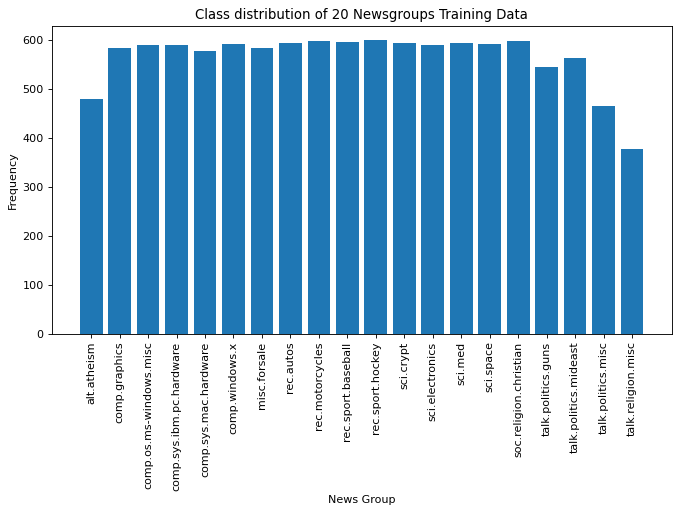

In [13]:
# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

### **3.1**

In [14]:
news_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [15]:
print('Testing data size:', len(news_test['data']))

Testing data size: 7532


In [16]:
# Finding frequency of each category
targets_test, frequency_test = np.unique(news_test.target, return_counts=True)
targets_test_str = np.array(news_test.target_names)
print(list(zip(targets_test_str, frequency_test)))

[('alt.atheism', 319), ('comp.graphics', 389), ('comp.os.ms-windows.misc', 394), ('comp.sys.ibm.pc.hardware', 392), ('comp.sys.mac.hardware', 385), ('comp.windows.x', 395), ('misc.forsale', 390), ('rec.autos', 396), ('rec.motorcycles', 398), ('rec.sport.baseball', 397), ('rec.sport.hockey', 399), ('sci.crypt', 396), ('sci.electronics', 393), ('sci.med', 396), ('sci.space', 394), ('soc.religion.christian', 398), ('talk.politics.guns', 364), ('talk.politics.mideast', 376), ('talk.politics.misc', 310), ('talk.religion.misc', 251)]


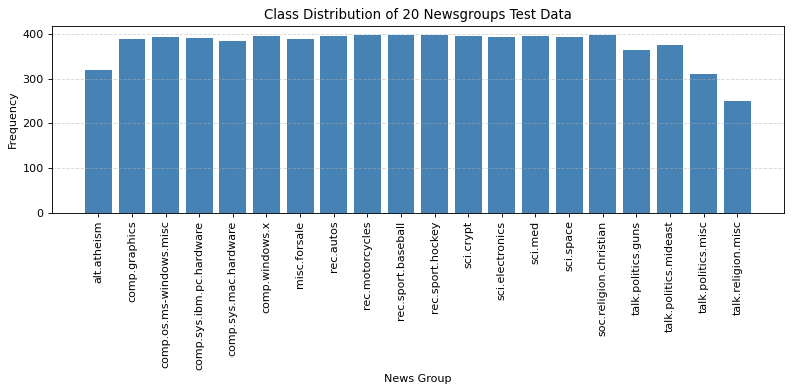

In [17]:
 # Testing data class distribution
fig = plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(targets_test_str, frequency_test, color='steelblue')
plt.xticks(rotation=90)
plt.title('Class Distribution of 20 Newsgroups Test Data')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **3.2 Dataframes**

In [18]:
news_train_df = pd.DataFrame({'data': news_train.data, 'target': news_train.target})
news_train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [19]:
news_test_df = pd.DataFrame({'data': news_test.data, 'target': news_test.target})
news_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


### **4. NLP Preprocessing**

In [20]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Define the text preprocessing function
def preprocess_text(text):
    # Tokenize the text using spaCy
    doc = nlp(text)

    # Lemmatize the tokens and remove stopwords
    tokens = [token.lemma_ for token in doc if not token.is_stop]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply the preprocessing function to your DataFrame column
news_train_df['data'] = news_train_df['data'].apply(preprocess_text)
news_train_df.head()


,data,target
0,wonder enlighten car see \n day . 2 - door spo...,7
1,fair number brave soul upgrade SI clock oscill...,4
2,"folk , mac plus finally give ghost weekend \n ...",4
3,\n Weitek address / phone number ? like info...,1
4,"article < c5owcb.n3p@world.std.com > , tombake...",14


In [21]:
# Apply the preprocessing function to your DataFrame column
news_test_df['data'] = news_test_df['data'].apply(preprocess_text)
news_test_df.head()

,data,target
0,little confused model 88 - 89 bonneville . \n ...,7
1,"familiar format "" x - face : "" thingie , \n se...",5
2,"\n word , yes . \n",0
3,"\n attack Iraqis drive Kuwait , \n country cit...",17
4,\n spend solid month argue thing \n objective ...,19


In [22]:
news_test_df.target

0        7
1        5
2        0
3       17
4       19
        ..
7527    14
7528     4
7529     9
7530     6
7531    15
Name: target, Length: 7532, dtype: int64

### **4.1**

In [23]:
# accesing the features and target
X_train_data = pd.DataFrame(news_train_df['data'], columns=["data"])
y_train = pd.DataFrame(news_train_df['target'])
X_test_data = pd.DataFrame(news_test_df['data'], columns=["data"])
y_test = pd.DataFrame(news_test_df['target'])

In [24]:
# viewing the training data
X_train_data

,data
0,wonder enlighten car see \n day . 2 - door spo...
1,fair number brave soul upgrade SI clock oscill...
2,"folk , mac plus finally give ghost weekend \n ..."
3,\n Weitek address / phone number ? like info...
4,"article < c5owcb.n3p@world.std.com > , tombake..."
...,...
11309,DN > : nyeda@cnsvax.uwec.edu ( David Nye ) \n ...
11310,"( old ) Mac 512k Mac Plus , \n problem . \n\n ..."
11311,"instal DX2 - 66 cpu clone motherboard , try mo..."
11312,"\n require hyper - sphere . 3 - space , 4 po..."


In [25]:
# viewing the testing data
y_test

,target
0,7
1,5
2,0
3,17
4,19
...,...
7527,14
7528,4
7529,9
7530,6


In [26]:
def preprocess_data(data):
  """
  Function to preprocess the data which involves removing URL,
  removing special characters, numbers, extra spaces, etc
  """
  data = re.sub(r'\S*https?:\S*', '', data)
  data = re.sub('[^A-Za-z]+', ' ', data)

  altered_data_words = []
  for word in data.split():
    if word.lower() not in stopwords.words("english"):
      altered_data_words.append(word)
  
  data = ' '.join(altered_data_words)

  data = data.lower()

  data = data.strip()

  return data

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# creating a new column that has preprocessed datas
X_train_data['preprocessed_data'] = X_train_data['data'].apply(lambda x: preprocess_data(x))

### **5.1 Vectorization with Tf-Idf Vectorizer**

In [29]:
# initialize the vectorizer for word importance
vectorizer = TfidfVectorizer(min_df=5, max_df=0.95)

# applying the vectorizer to the preprocessed datas
X_train = vectorizer.fit_transform(X_train_data['preprocessed_data'])
X_test = vectorizer.transform(X_test_data['data'])

In [30]:
# viewing the sparse matrix representation of the features in the training data
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### **6. Classification**

**SVM**

In [31]:
from sklearn.svm import SVC

# Initialize and fit the RBF SVM classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [32]:
# Make predictions on the test data
predictions = svm_clf.predict(X_test)

In [33]:
# Calculate training accuracy
train_prediction = svm_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_prediction)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_prediction = svm_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_prediction)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9648223439985858
Testing Accuracy: 0.6718003186404673


In [35]:
# Generate classification report
report = classification_report(y_test, test_prediction)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.49      0.47       319
           1       0.58      0.69      0.63       389
           2       0.65      0.59      0.62       394
           3       0.68      0.65      0.66       392
           4       0.76      0.66      0.70       385
           5       0.85      0.65      0.74       395
           6       0.75      0.78      0.77       390
           7       0.50      0.76      0.60       396
           8       0.65      0.74      0.69       398
           9       0.84      0.77      0.80       397
          10       0.94      0.83      0.88       399
          11       0.89      0.64      0.74       396
          12       0.49      0.64      0.56       393
          13       0.78      0.78      0.78       396
          14       0.66      0.75      0.70       394
          15       0.65      0.77      0.70       398
          16       0.58      0.67      0.62       364
   

**time consuming**

In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [2, 5, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'tol': [0.1, 0.001]
}

# Perform grid search cross-validation
svm_grid = GridSearchCV(svm_clf, parameters, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)


KeyboardInterrupt



In [ ]:
# Print the best parameters and best score
print("Best Parameters:", svm_grid.best_params_)
print("Best Score:", svm_grid.best_score_)

**Hypertuned SVM**

In [39]:
from sklearn.svm import SVC

# Initialize and fit the RBF SVM classifier
svm_clf = SVC(kernel='poly', gamma= 'scale')
svm_clf.fit(X_train, y_train)       #from above insert the best params and test again and visualize CM

SVC(kernel='poly')

In [40]:
# Make predictions on the test data
predictions = svm_clf.predict(X_test)

In [41]:
# Calculate training accuracy
train_predictions = svm_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_predictions = svm_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.970832596782747
Testing Accuracy: 0.5613382899628253


In [42]:
# creating the confusion matrix
svm_cm = confusion_matrix(y_test, predictions)

In [ ]:
plt.imshow(svm_cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

### **7. Vectorization with Word2Vec**

In [43]:
from gensim.models import Word2Vec

# Prepare the data as a list of sentences
sentences = [text.split() for text in news_train_df['data']]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=7, min_count=1, workers=4)


In [45]:
def document_vector(model, doc):
    # Get word vectors for each word in the document
    word_vectors = [model.wv.get_vector(word) for word in doc if word in model.wv]

    # If no words in the document are in the vocabulary, return zeros
    if not word_vectors:
        return np.zeros(model.vector_size)

    # Calculate the mean vector
    doc_vector = np.mean(word_vectors, axis=0)

    return doc_vector

# Convert training data into Word2Vec vectors
X_train_w2v = np.vstack([document_vector(model, doc) for doc in sentences])

# Convert testing data into Word2Vec vectors
X_test_w2v = np.vstack([document_vector(model, doc) for doc in [text.split() for text in news_test_df['data']]])


### **Classification with Word2vec & Boosting**

In [46]:
%%time
import lightgbm as lgb

# Create a base LGBM classifier
lgbm = lgb.LGBMClassifier()

# Train the model 
y_train = news_train_df.target
lgbm.fit(X_train_w2v, y_train)

CPU times: user 2min 26s, sys: 418 ms, total: 2min 26s
Wall time: 2min 27s


LGBMClassifier()

In [47]:
# Create an AdaBoost model on top of the Random Forest model
adaboost_rf = AdaBoostClassifier(estimator=lgbm)

# Train the AdaBoost model
adaboost_rf.fit(X_train_w2v, y_train)

AdaBoostClassifier(estimator=LGBMClassifier())

In [48]:
# Make predictions on the test data
ada_predictions = adaboost_rf.predict(X_test_w2v)

In [49]:
# Calculate training accuracy
train_predictions = adaboost_rf.predict(X_train_w2v)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_predictions = adaboost_rf.predict(X_test_w2v)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.965706204702139
Testing Accuracy: 0.3981678173127987


In [69]:
# Generate classification report
report = classification_report(y_test, test_predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.24      0.24       319
           1       0.33      0.35      0.34       389
           2       0.36      0.33      0.34       394
           3       0.38      0.36      0.37       392
           4       0.30      0.26      0.28       385
           5       0.53      0.53      0.53       395
           6       0.61      0.66      0.63       390
           7       0.26      0.39      0.31       396
           8       0.32      0.34      0.33       398
           9       0.43      0.46      0.44       397
          10       0.64      0.55      0.59       399
          11       0.61      0.53      0.57       396
          12       0.29      0.26      0.27       393
          13       0.38      0.36      0.37       396
          14       0.39      0.38      0.38       394
          15       0.47      0.61      0.53       398
          16       0.31      0.31      0.31       364
   

**XGB testing** 

In [51]:
# import xgboost as xgb

# # Convert your Word2Vec vectorized data to DMatrix format
# dtrain = xgb.DMatrix(X_train_w2v, label=y_train)

# # Set the hyperparameters for the XGBoost model
# params = {
#     'objective': 'multi:softmax',  # Set the objective function for multiclass classification
#     'num_class': 20,      # Set the number of classes
#     'eval_metric': 'merror'        # Set the evaluation metric (multiclass error rate)
# }

# # Train the XGBoost model
# num_rounds = 100  # Number of boosting rounds (iterations)
# xgb_model = xgb.train(params, dtrain, num_rounds)

# # Make predictions on test data
# dtest = xgb.DMatrix(X_test_w2v)  # Convert your Word2Vec vectorized test data to DMatrix format
# predictions = xgb_model.predict(dtest)


In [ ]:
# # Convert the predictions to integer labels
# predictions = predictions.astype(int)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

# # Generate classification report
# report = classification_report(y_test, predictions)
# print("Classification Report:\n", report)

### **Classification with Dense NN**

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [65]:
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Define a function for lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

# Apply lemmatization to your text data
news_train_df["data_lemmatized"] = news_train_df.data.apply(lemmatize_text)
news_test_df["data_lemmatized"] = news_test_df.data.apply(lemmatize_text)



# Using TFidf Vectorizer and Removing words that appear in less that 0.05 percent of documents
tfidfV = TfidfVectorizer(stop_words='english', min_df = 0.0005) 


# Data  for Neural Networks
xTrain = tfidfV.fit_transform(news_train_df.data_lemmatized)
yTrainHot = to_categorical(news_train_df["target"], num_classes=20)
xTest = tfidfV.transform(news_test_df.data_lemmatized)

xTrain_dense = xTrain.toarray()

# New shape for neural network. Reduced dimesnions to 13946 to keep only important words and faster the training process.
print(xTrain_dense.shape)

(11314, 12616)


In [66]:
# Defining the model
model1 = Sequential()
model1.add(Dense(1500, input_dim=xTrain_dense.shape[1], activation='relu'))
model1.add(Dense(20, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
esc = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True)


# fitting the model.
m1 = model1.fit(xTrain_dense, yTrainHot, batch_size = 64, epochs=500, callbacks=[esc, cp], validation_split=0.2)

Epoch 1/500
138/142 [============================>.] - ETA: 0s - loss: 1.8110 - accuracy: 0.6322
Epoch 1: val_loss improved from inf to 0.95365, saving model to weights.hdf5
142/142 [==============================] - 6s 13ms/step - loss: 1.7923 - accuracy: 0.6341 - val_loss: 0.9536 - val_accuracy: 0.7548
Epoch 2/500
138/142 [============================>.] - ETA: 0s - loss: 0.4741 - accuracy: 0.8898
Epoch 2: val_loss improved from 0.95365 to 0.80395, saving model to weights.hdf5
142/142 [==============================] - 2s 11ms/step - loss: 0.4762 - accuracy: 0.8885 - val_loss: 0.8039 - val_accuracy: 0.7654
Epoch 3/500
140/142 [============================>.] - ETA: 0s - loss: 0.2001 - accuracy: 0.9573
Epoch 3: val_loss did not improve from 0.80395
142/142 [==============================] - 1s 7ms/step - loss: 0.2000 - accuracy: 0.9574 - val_loss: 0.8080 - val_accuracy: 0.7596
Epoch 4/500
139/142 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9681
Epoch 4: val

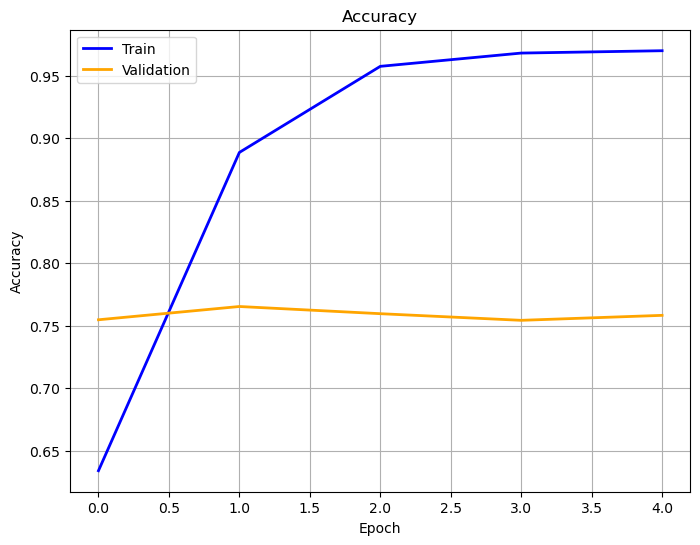

In [67]:
plt.figure(figsize=(8, 6))

# Set the plot title and labels
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot the training accuracy
plt.plot(m1.history['accuracy'], label='Train', color='blue', linewidth=2)

# Plot the validation accuracy
plt.plot(m1.history['val_accuracy'], label='Validation', color='orange', linewidth=2)

# Set the legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

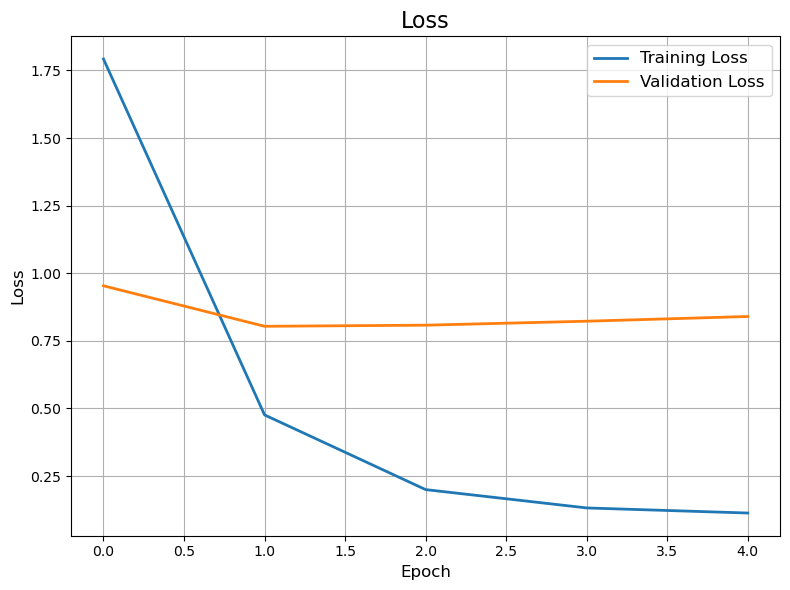

In [68]:
plt.figure(figsize=(8, 6))
plt.title('Loss', fontsize=16)
plt.plot(m1.history['loss'], label='Training Loss', linewidth=2)
plt.plot(m1.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# Defining the model
model2 = Sequential()
model2.add(Dense(1500, input_dim=xTrain_dense.shape[1], activation='relu'))
model2.add(Dense(1000,  activation='relu'))
model2.add(Dense(20, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
esc = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True)


# fitting the model.
m2 = model2.fit(xTrain_dense, yTrainHot, batch_size = 128, epochs=500, callbacks=[esc, cp], validation_split=0.2)

Epoch 1/500
67/71 [===========================>..] - ETA: 0s - loss: 1.7709 - accuracy: 0.5427
Epoch 1: val_loss improved from inf to 0.89654, saving model to weights.hdf5
71/71 [==============================] - 3s 26ms/step - loss: 1.7275 - accuracy: 0.5518 - val_loss: 0.8965 - val_accuracy: 0.7340
Epoch 2/500
68/71 [===========================>..] - ETA: 0s - loss: 0.3797 - accuracy: 0.8914
Epoch 2: val_loss improved from 0.89654 to 0.86504, saving model to weights.hdf5
71/71 [==============================] - 1s 20ms/step - loss: 0.3815 - accuracy: 0.8916 - val_loss: 0.8650 - val_accuracy: 0.7543
Epoch 3/500
71/71 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9621
Epoch 3: val_loss did not improve from 0.86504
71/71 [==============================] - 1s 10ms/step - loss: 0.1412 - accuracy: 0.9621 - val_loss: 0.8861 - val_accuracy: 0.7490
Epoch 4/500
67/71 [===========================>..] - ETA: 0s - loss: 0.1094 - accuracy: 0.9690
Epoch 4: val_loss did not

In [72]:
# Testing
xTest_dense = xTest.toarray()

# # loading the best weights
# model1.load_weights("/content/weights.hdf5")

# predicting classes for testing cases.
yP1 = model2.predict(xTest_dense)
yP2 = np.argmax(yP1,axis=1)

# Accuracy
np.mean(yP2 == news_test_df["target"])

236/236 [==============================] - 1s 2ms/step


0.6631704726500266

**...................................fin.....................................**